In [1]:
from scipy.linalg import solve_toeplitz
from scipy.sparse import identity
from pathlib import Path
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = np.array([4.224371872086318813e-01, 3.605965189622313272e-01, 3.486721371284548510e-01])
dimension = alpha.size

In [3]:
kronecker = qp.Kronecker(dimension = dimension, alpha = alpha)
randomized_kron = qp.Kronecker(dimension = dimension, alpha = alpha, randomize = True)
integrand = qp.Keister(kronecker)
random_integrand = qp.Keister(randomized_kron)

In [4]:
bayes = qp.CubBayesKronecker(integrand)

In [26]:
clt = qp.CubQMCCLT(random_integrand)

In [27]:
integrand.exact_integ(3)

2.168309102165481

In [29]:
trials = 1000

samples = np.empty(trials)
for i in range(trials):
    clt_integral, clt_data = clt.integrate()
    samples[i] = clt_data.n

In [30]:
def get_heights(samples):
    return np.array([np.sum(samples == x) for x in np.unique(samples)])

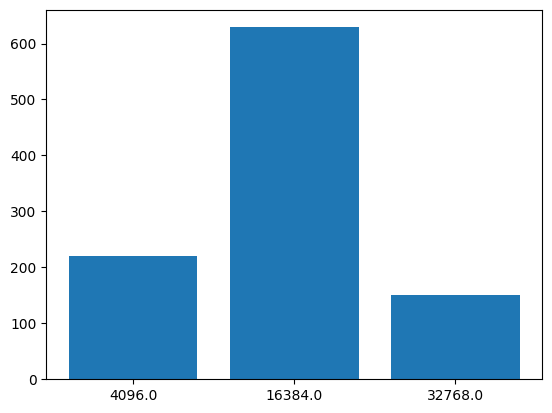

In [31]:
plt.bar(np.unique(samples).astype(str), get_heights(samples));

In [5]:
bayes_integral, bayes_data = bayes.integrate()
bayes_integral, bayes_data

94.47288012504578


(2.168928369161015, (4096, 94.5482120513916, 94.47288012504578))

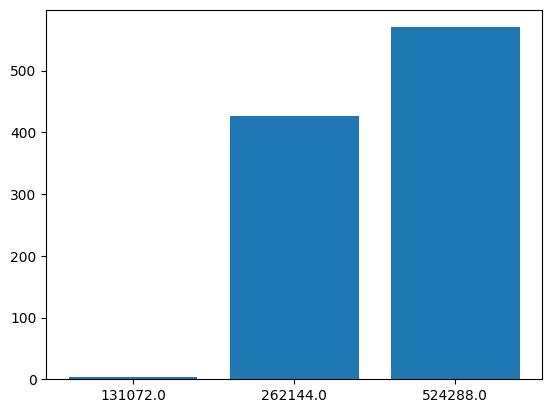

In [20]:
trials = 1000
clt = qp.CubQMCCLT(random_integrand, abs_tol = 1e-3)
samples = np.empty(trials)
for i in range(trials):
    clt_integral, clt_data = clt.integrate()
    samples[i] = clt_data.n

plt.bar(np.unique(samples).astype(str), get_heights(samples));

<BarContainer object of 3 artists>

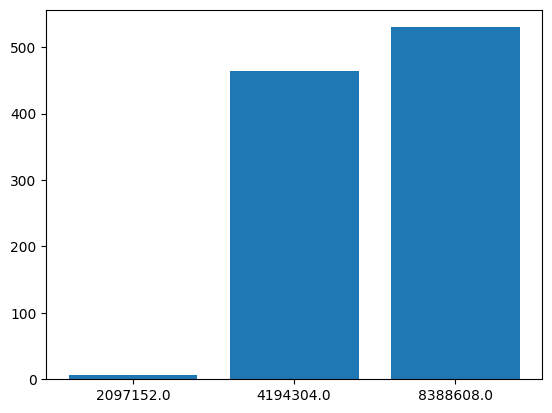

In [11]:
trials = 1000
clt = qp.CubQMCCLT(random_integrand, abs_tol = 1e-4)
samples = np.empty(trials)
for i in range(trials):
    clt_integral, clt_data = clt.integrate()
    samples[i] = clt_data.n

plt.bar(np.unique(samples).astype(str), get_heights(samples))

In [13]:
trials = 100

bayes_samples = np.empty(trials)
bayes_time = np.empty(trials)
bayes_invert_time = np.empty(trials)

for i in range(trials):
    bayes_integral, bayes_data = bayes.integrate()
    bayes_samples[i] = bayes_data[0]
    bayes_time[i] = bayes_data[1]
    bayes_invert_time[i] = bayes_data[2]

In [ ]:
solve_toeplitz((first_row, first_row), identity(n).toarray(), check_finite = False)

In [35]:
bayes_invert_time

array([107.010288  , 107.81617904, 108.34582901, 108.72179699,
       108.68316317, 108.72617984, 108.94318032, 108.89958048,
       108.87502885, 108.93323851, 108.95657849, 108.9928267 ,
       109.04751682, 109.03743887, 109.20925426, 108.42564011,
       108.19912767, 108.21676326, 108.17857814, 108.39190364,
       108.4624424 , 108.55605483, 108.73883963, 108.83328748,
       108.88609648, 108.85446739, 108.94047213, 109.0650773 ,
       108.88911653, 108.32338858, 108.23099089, 108.30078483,
       108.21518183, 108.40321374, 108.60259485, 108.26012468,
       106.9048233 , 106.79582405, 106.8723135 , 107.371279  ,
       107.31918359, 106.90860224, 107.04092932, 107.453722  ,
       108.75995088, 108.88288689, 108.98603559, 108.94548082,
       108.19496059, 108.37848401, 108.22316432, 108.16534948,
       108.35207415, 108.54999828, 108.70836115, 108.73848796,
       108.82059836, 108.88598895, 108.98949814, 108.99997902,
       108.46043205, 108.045048  , 108.14070129, 108.14

In [18]:
bayes_invert_time / bayes_time

array([0.99890114, 0.99893203, 0.99892669, 0.99898252, 0.99888455,
       0.99896835, 0.99893548, 0.9988956 , 0.99894637, 0.99887335,
       0.99893246, 0.99899676, 0.99865029, 0.99893089, 0.99887267,
       0.99891831, 0.9989064 , 0.99905747, 0.99891641, 0.99897313,
       0.99880763, 0.99893203, 0.99893287, 0.9986857 , 0.99894924,
       0.99885317, 0.99887424, 0.99887261, 0.99863561, 0.99881499,
       0.99884023, 0.99896336, 0.99895311, 0.99880909, 0.99895278,
       0.99892717, 0.99897057, 0.99900079, 0.99896956, 0.99901713,
       0.99903626, 0.99896766, 0.99889373, 0.9988865 , 0.99902074,
       0.99901722, 0.99879225, 0.99882706, 0.9990512 , 0.99882016,
       0.99884486, 0.99890744, 0.99903449, 0.99883487, 0.99896829,
       0.99862493, 0.99888172, 0.99885323, 0.99893914, 0.99903247,
       0.99899739, 0.99890516, 0.99894188, 0.99883086, 0.99890545,
       0.99886311, 0.99906449, 0.99896222, 0.99888748, 0.99901151,
       0.99893616, 0.99888107, 0.99897247, 0.99877237, 0.99897

<BarContainer object of 1 artists>

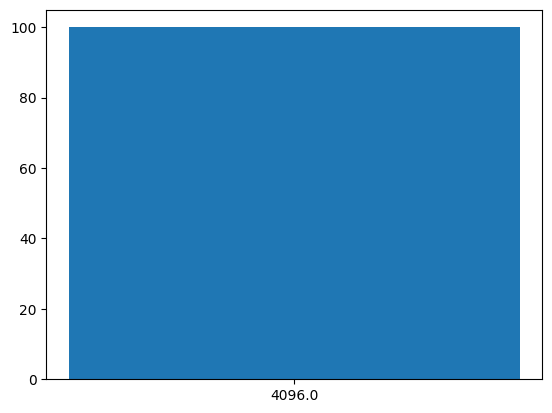

In [14]:
plt.bar(np.unique(bayes_samples).astype(str), get_heights(bayes_samples))

In [34]:
trials = 1
tigher_bayes = qp.CubBayesKronecker(integrand, abs_tol = 5e-3)

baye_samples = np.empty(trials)
baye_time = np.empty(trials)
baye_invert_time = np.empty(trials)

for i in range(trials):
    bayes_integral, bayes_data = tigher_bayes.integrate()
    baye_samples[i] = bayes_data[0]
    baye_time[i] = bayes_data[1]
    baye_invert_time[i] = bayes_data[2]

In [ ]:
plt.bar(np.unique(baye_samples).astype(str), get_heights(baye_samples))

In [ ]:
tigher_bayes = qp.CubBayesKronecker(integrand, abs_tol = 1e-4)
bayes_integral, bayes_data = tigher_bayes.integrate()

In [ ]:
print(bayes_data)